1. অজানা ডেটা পয়েন্ট থেকে বাকি সব ডেটা পয়েন্টের দূরত্ব বের করতে হবে
2. দূরত্বের মান অনুযায়ী ছোট থেকে বড় আকারে (ascending order) ডেটা পয়েন্টগুলো সর্ট (sorting) করে নিতে হবে
3. সর্ট করা পয়েন্ট থেকে প্রথম k-সংখ্যক পয়েন্ট নিতে হবে।
4. এই k-সংখ্যক ডেটা পয়েন্টের মধ্যে যে ক্লাসের পয়েন্ট সবচে বেশি সংখ্যকবার আছে,অজানা ডেটা পয়েন্টটিকে সেই ক্লাস হিসেবে চিহ্নিত করতে হবে।

Add new sample [weight,height]= 80,140
[80, 140]


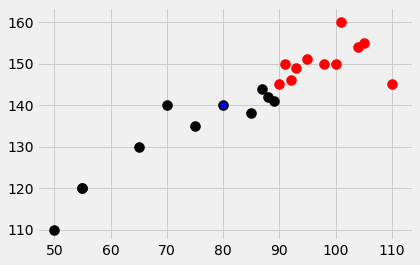

[('k', 7)]
Result k
Footballer
Add new sample [weight,height]= 110,155
[110, 155]


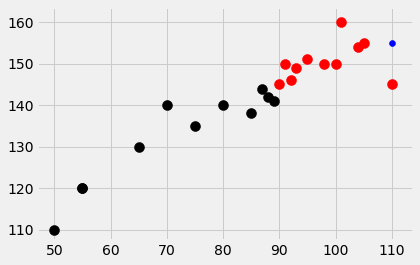

[('r', 7)]
Result r
Wrestler
Add new sample [weight,height]= 0,0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

dataset = {
        'k':[[50,110],[65,130],[70,140],[55,120],[85,138],[88,142],[87,144],[89,141],[75,135],[80,140],[55,120]],
        'r':[[90,145],[100,150],[110,145],[105,155],[98,150],[91,150],[92,146],[93,149],[95,151],[101,160],[104,154]],
        }

def scatter_plot(new_feat):
    # In dataset there are 2 type data'k' & 'r'
    # so this loop is use to choice each element
    for i in dataset:

        # now we know that , i = k or r
        # so now it will take the arry that under the 'k' variable
        # so here dataset[i] is a 2D array, and ii is a each element of 2D array
        for ii in dataset[i]:
            # now ii is a 2D array so that we will plot one by one!!!
            plt.scatter(ii[0], ii[1], s=100, color=i)

    # we need to plot new feature also! so its here
    plt.scatter(new_feat[0],new_feat[1],color='b')
    # plt.show for show  the graph
    plt.show()
    
def k_NN(data,predict,k=7):
    distances = []
    # again we will take the element here k or r
    for group in data:

        # we will go inside each 2D array
        for features in data[group]:
            # here we measure the distance
            euclidian_distances=np.linalg.norm(np.array(features)-np.array(predict))
            # all the distence adding into a array
            distances.append([euclidian_distances,group])


            # take votes for near by element
    #list comprehension(consists of: output expression,input sequence & coditional logic)
    votes = [i[1] for i in sorted(distances)[:k]] 
    #for better perception,print all them separately and brood over
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

while True:
    # we are taking 2 inputs by adding them with a ',' so that we splite that string, for getting seperate input
    new_arr = input('Add new sample [weight,height]= ').split(',')

    # on this array we will take our input
    new_feat = []
    new_feat.append(int(new_arr[0]))
    new_feat.append(int(new_arr[1]))

    if new_feat==[0,0]:
        break
    else:
        print(new_feat)
        scatter_plot(new_feat)
        result = k_NN(dataset,new_feat,k=7)
        print('Result',result)
        if result=='k':
            print('Footballer')
        else:
            print('Wrestler')
        